# Single qubit experiment

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qutip import *
from IPython.display import display
from IPython.display import Math 

# xcd color reference http://xkcd.com/color/rgb/
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set(palette=sns.xkcd_palette(colors))

sns.set_style("whitegrid",{'axes.edgecolor': 'black','legend.frameon': True})
sns.set_context("paper",font_scale=1.4, rc={"lines.linewidth": 2})

from scipy.linalg import eig,norm
from math import *


# 设置驱动
from DriveWave import QubitWave
T_R =  40e-6
dt  =  1e-7
Amp_R = 0.1

amp1 = 1.0
amp2 = 1.0

Q = QubitWave(T_R,Amp_R=Amp_R,dt = dt)
print('OK')

OK


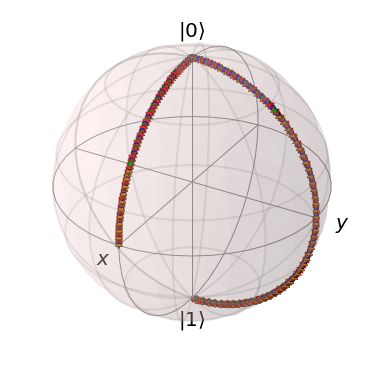

473


In [43]:
W = QubitWave(T_R,Amp_R=Amp_R,dt = dt)
R1 = W.R(theta=pi,phi=0)
R2 = W.R(theta=pi/2,phi=pi/2)

ALL = R2.cT()*R2*R1
H, dt = ALL.Normlized_H_dt()

# print(ALL.H2U(H,dt))
# print(ALL.U - ALL.H2U(H,dt))

a = ALL.evo_H(H,dt)

import qutip as qt
B = qt.Bloch()
for ai in a:
    B.add_states(qt.Qobj(ai),kind='point')
B.show()
print(len(ALL))

# 数值模拟

### 模拟本征态演化


16660


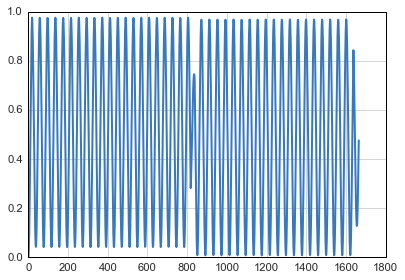

In [50]:
from DriveWave import QubitWave
from math import *

Theta = 4*pi/10
B_0  = 1
w_B = 0.05 * B_0   

t_i = 0
t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop


Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
# 注意 t = [-x/omega_0, x/omega_0]
# 因此， * T_R / (2 * pi)
t = np.linspace(t_i, t_f, Nt)   # 一圈
t2 = np.linspace(t_i, t_f, Nt)  # 半圈

theta = np.ones(Nt) * Theta
phi   = w_B * t

fx1 = B_0 * np.sin(theta) * np.cos(phi)
fy1 = B_0 * np.sin(theta) * np.sin(phi)
fz1 = B_0 * np.cos(theta)

# t = t + t[-1] + (t[1]-t[0])
phi   = phi[::-1]
fx2 = B_0 * np.sin(theta) * np.cos(phi)
fy2 = B_0 * np.sin(theta) * np.sin(phi)
fz2 = B_0 * np.cos(theta)


W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0])+ pi/2 # 制备本征态，然后转到叠加态（pi/2）
phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

# pi脉冲操作是U.dag*sigmax*U三个操作的和，三个操作可以通过两个脉冲来完成
phi   = np.arctan2(fy1[-1],fx1[-1])   + pi/2   # 绕垂直的轴转，加 pi/2                        改动
R1_pi = Q.R(pi, phi)

W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)

phi   = np.arctan2(fy2[-1],fx2[-1])  + pi/2# 绕垂直的轴转，加 pi/2                            改动
R2_pi = Q.R(pi, phi)

theta = np.arctan2(np.sqrt(fx2[-1]**2+fy2[-1]**2),fz2[-1])
phi   = np.arctan2(fy2[-1],fx2[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
R2 = Q.R(Theta, phi)        # 测量Hamilton的本征态 的叠加态


# W_all = R2.cT()  * R2_pi * W2 * R1_pi * W1 * R1
W_all = R2.cT()  * R2_pi * W2 * R1_pi * W1 * R1

ALL = W_all
H, dt0 = ALL.Normlized_H_dt(spin=-1/2.0)
a = ALL.evo_H(H,dt0)
N0 = 0
Na = len(R1) + len(W1) + len(R1_pi) +len(W2) + len(R2_pi) + len(R2.cT())

import qutip as qt
B = qt.Bloch()
# for i, ai in enumerate(a[0:Na//2-300]):
probs = []
for i, ai in enumerate(a[N0:Na]):
    if i%10 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
        probs.append(np.abs(ai[0])**2)
# B.show()
print(len(ALL))
plt.plot(probs)

### 测Berry相位(SE)

In [87]:
from DriveWave import QubitWave
from math import *

def Mesure_bp_SE(Theta, m=0.05):
    
    B_0  = 1 / sin(Theta)
    w_B  = m * B_0

    t_i = 0
    t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop

    Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
#     print(Nt)
    # 注意 t = [-x/omega_0, x/omega_0]
    # 因此， * T_R / (2 * pi)
    t = np.linspace(t_i, t_f, Nt)   # 一圈
    t2 = np.linspace(t_i, t_f, Nt)  # 半圈

    theta = np.ones(Nt) * Theta
    phi   = w_B * t

    fx1 = B_0 * np.sin(theta) * np.cos(phi)
    fy1 = B_0 * np.sin(theta) * np.sin(phi)
    fz1 = B_0 * np.cos(theta)

    # t = t + t[-1] + (t[1]-t[0])
    phi   = phi[::-1]
    fx2 = B_0 * np.sin(theta) * np.cos(phi)
    fy2 = B_0 * np.sin(theta) * np.sin(phi)
    fz2 = B_0 * np.cos(theta)

    W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

    theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) - pi/2
    phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
    R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

    phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2     # 绕垂直的轴转，加 pi/2                        改动
    R1_pi = Q.R(pi, phi)

    W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)
#     print('W1',len(W1))
#     print(len(W2))

    phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2  # 绕垂直的轴转，加 pi/2                            改动
    R2_pi = Q.R(pi, phi)

    theta = np.arctan2(np.sqrt(fx2[-1]**2+fy2[-1]**2),fz2[-1])
    phi   = np.arctan2(fy2[-1],fx2[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
    R2 = Q.R(Theta, phi)        # 测量Hamilton的本征态 的叠加态


    W_all = R2.cT() * R2_pi * W2 * R1_pi * W1 * R1
    bp_phase = -4*pi*np.cos(Theta)
    return W_all, bp_phase

#     # W_all = R2.cT()*R2_pi*W2*R1_pi*W1 * R1

#     psi0=np.array([0. + 0.j, 1. + 0.j])
#     c1, c2 = W_all.U.dot(psi0)
#     print (c1,c2)
#     bphase = np.angle(c1)-np.angle(c2)
#     print(bphase)
#     print(4*pi*np.cos(Theta)-bphase)

# ALL = W_all
# H, dt = ALL.Normlized_H_dt()
# a = ALL.evo_H(H,dt)
# N0 = 0
# Na = len(R1) + len(W1)  + len(R1_pi) +len(W2) + len(R2_pi)

# print(N0, Na)

# import qutip as qt
# B = qt.Bloch()
# # for i, ai in enumerate(a[0:Na//2-300]):
# for i, ai in enumerate(a[N0:Na]):
#     if i%20 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
# B.show()
# print(len(ALL))

# ket2dm(Qobj(np.array([[c1],[c2]])))

### Test

In [39]:
Theta = pi / 10
m = 0.05
B_0  = 1 / sin(Theta)
w_B  = m * B_0

t_i = 0
t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop

Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
#     print(Nt)
# 注意 t = [-x/omega_0, x/omega_0]
# 因此， * T_R / (2 * pi)
t = np.linspace(t_i, t_f, Nt)   # 一圈
t2 = np.linspace(t_i, t_f, Nt)  # 半圈

theta = np.ones(Nt) * Theta
phi   = w_B * t

fx1 = B_0 * np.sin(theta) * np.cos(phi)
fy1 = B_0 * np.sin(theta) * np.sin(phi)
fz1 = B_0 * np.cos(theta)

# t = t + t[-1] + (t[1]-t[0])
phi   = phi[::-1]
fx2 = B_0 * np.sin(theta) * np.cos(phi)
fy2 = B_0 * np.sin(theta) * np.sin(phi)
fz2 = B_0 * np.cos(theta)

W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) - pi/2
phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2     # 绕垂直的轴转，加 pi/2                        改动
R1_pi = Q.R(pi, phi)

W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)
#     print('W1',len(W1))
#     print(len(W2))

phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2  # 绕垂直的轴转，加 pi/2                            改动
R2_pi = Q.R(pi, phi)

theta = np.arctan2(np.sqrt(fx2[-1]**2+fy2[-1]**2),fz2[-1])
phi   = np.arctan2(fy2[-1],fx2[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
R2 = Q.R(Theta, phi)        # 测量Hamilton的本征态 的叠加态


W_all = R2.cT() * R2_pi * W2 * R1_pi * W1 * R1
bp_phase = -4*pi*np.cos(Theta)


    # W_all = R2.cT()*R2_pi*W2*R1_pi*W1 * R1

psi0=np.array([0. + 0.j, 1. + 0.j])
c1, c2 = W_all.U.dot(psi0)
print (c1,c2)
bphase = np.angle(c1)-np.angle(c2)
print(bphase)
print(4*pi*np.cos(Theta)-bphase)

(0.6743037892640084-0.21445582832914067j) (0.6732740841892761+0.21453462433618378j)
-0.6163965850523881
12.567725244018611


### 测Berry相位(CPMG)

In [89]:
from DriveWave import QubitWave
from math import *

def Mesure_bp_CPMG(Theta, m=0.05):
    
    B_0  = 1 / sin(Theta)
    w_B  = m * B_0

    t_i = 0
    t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop

    Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
    Nt2 = int((t_f/2.0-t_i) * T_R/(2 *pi) / dt)
    # 注意 t = [-x/omega_0, x/omega_0]
    # 因此， * T_R / (2 * pi)

    t1 = np.linspace(t_i, t_f, Nt)   # 一圈
    t2 = np.linspace(t_i, t_f/2.0, Nt2)  # 半圈

    theta_1 = np.ones(Nt) * Theta
    theta_2 = np.ones(Nt2) * Theta
    phi_1   = w_B * t1
    phi_2   = w_B * t2

    fx1 = B_0 * np.sin(theta_2) * np.cos(phi_2)
    fy1 = B_0 * np.sin(theta_2) * np.sin(phi_2)
    fz1 = B_0 * np.cos(theta_2)

    # t = t + t[-1] + (t[1]-t[0])
    phi_1   = phi_1[::-1] - pi
    fx2 = B_0 * np.sin(theta_1) * np.cos(phi_1)
    fy2 = B_0 * np.sin(theta_1) * np.sin(phi_1)
    fz2 = B_0 * np.cos(theta_1)

    phi_2   = phi_2 + pi
    fx3 = B_0 * np.sin(theta_2) * np.cos(phi_2)
    fy3 = B_0 * np.sin(theta_2) * np.sin(phi_2)
    fz3 = B_0 * np.cos(theta_2)

    Q = QubitWave(T_R,Amp_R=Amp_R,dt = dt)
    W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

    theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) - pi/2
    phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
    R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

    # pi脉冲操作是U.dag*sigmax*U三个操作的和，三个操作可以通过两个脉冲来完成
    phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2     # 绕垂直的轴转，加 pi/2                        改动
    R1_pi = Q.R(pi, phi)


    W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)

    phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2 # 绕垂直的轴转，加 pi/2                            改动
    R2_pi = Q.R(pi, phi)

    W3 = Q.Drive_Standard([fx3,fy3,fz3],spin=1.0)

    theta = np.arctan2(np.sqrt(fx3[-1]**2+fy3[-1]**2),fz3[-1])
    phi   = np.arctan2(fy3[-1],fx3[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
    R2 = Q.R(theta, phi)        # 测量Hamilton的本征态 的叠加态


    W_all = R2.cT() * W3 * R2_pi * W2 * R1_pi * W1 * R1
    
    bp_phase = -4*pi*np.cos(Theta)
    return W_all, bp_phase
#     psi0=np.array([0. + 0.j, 1. + 0.j])
#     c1, c2 = W_all.U.dot(psi0)
#     print (c1,c2)
#     bphase = np.angle(c1)-np.angle(c2)
#     print(bphase)
#     print(4*pi*np.cos(Theta)-bphase)

# ALL = W_all
# H, dt0 = ALL.Normlized_H_dt()
# a = ALL.evo_H(H,dt0)
# N0 = 0
# Na = len(R1) + len(W1)  + len(R1_pi) +len(W2)+ len(R2_pi) + len(W3)

# print(N0, Na)

# import qutip as qt
# B = qt.Bloch()
# # for i, ai in enumerate(a[0:Na//2-300]):
# for i, ai in enumerate(a[N0:Na]):
#     if i%20 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
# B.show()
# print(len(ALL))

## Scheme 1(SE)

In [90]:
from DriveWave import QubitWave
from math import *

def Scheme1_SE(Theta_a, m=0.05):
        
    B_0 = 1 / sin(Theta_a)
    w_B  = m * B_0
    Theta_c = np.arccos((cos(Theta_a)-2*w_B/B_0+w_B**2*cos(Theta_a)/(B_0**2+w_B**2))\
               /(1+(w_B**2-2*w_B*B_0*cos(Theta_a))/(B_0**2+w_B**2)))
    t_i = 0
    t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop

    Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
    # 注意 t = [-x/omega_0, x/omega_0]
    # 因此， * T_R / (2 * pi)
    t = np.linspace(t_i, t_f, Nt)   # 一圈
    t2 = np.linspace(t_i, t_f, Nt)  # 半圈

    theta_a = np.ones(Nt) * Theta_a
    theta_c = np.ones(Nt) * Theta_c
    phi   = w_B * t

    fx1 = B_0 * np.sin(theta_a) * np.cos(phi)
    fy1 = B_0 * np.sin(theta_a) * np.sin(phi)
    fz1 = B_0 * np.cos(theta_a)

    # t = t + t[-1] + (t[1]-t[0])
    phi   = phi[::-1]
    fx2 = B_0 * np.sin(theta_c) * np.cos(phi)
    fy2 = B_0 * np.sin(theta_c) * np.sin(phi)
    fz2 = B_0 * np.cos(theta_c)

    Q = QubitWave(T_R,Amp_R=Amp_R,dt = dt)
    W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

    theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) - pi/2
    phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
    R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

    # pi脉冲操作是U.dag*sigmax*U三个操作的和，三个操作可以通过两个脉冲来完成
    phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2     # 绕垂直的轴转，加 pi/2                        改动
    R1_pi = Q.R(pi, phi)


    W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)

    phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2 # 绕垂直的轴转，加 pi/2                            改动
    R2_pi = Q.R(pi, phi)

    theta = np.arctan2(np.sqrt(fx2[-1]**2+fy2[-1]**2),fz2[-1])
    phi   = np.arctan2(fy2[-1],fx2[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
    R2 = Q.R(theta, phi)        # 测量Hamilton的本征态 的叠加态


    W_all = R2.cT() * R2_pi * W2 * R1_pi * W1 * R1

    bp_phase = -2*pi*np.cos(Theta_a)-2*pi*cos(Theta_c)
    return W_all, bp_phase
#     return -2*pi*np.cos(Theta_a)-2*pi*cos(Theta_c)
#     psi0=np.array([0. + 0.j, 1. + 0.j])
#     c1, c2 = W_all.U.dot(psi0)
#     print (c1,c2)
#     bphase = np.angle(c1)-np.angle(c2)
#     print(bphase)
#     print(2*pi*np.cos(Theta_a)+2*pi*cos(Theta_c)-bphase)

# ALL = W_all
# H, dt = ALL.Normlized_H_dt()
# a = ALL.evo_H(H,dt)
# N0 = 0
# Na = len(R1) + len(W1)  + len(R1_pi) +len(W2) + len(R2_pi)

# print(N0, Na)

# import qutip as qt
# B = qt.Bloch()
# # for i, ai in enumerate(a[0:Na//2-300]):
# for i, ai in enumerate(a[N0:Na]):
#     if i%20 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
# B.show()
# print(len(ALL))

## Scheme 2

In [112]:
from DriveWave import QubitWave

def Scheme2(Theta, m=0.05):
    
    B_0 = 1 / sin(Theta)
    w_B = m * B_0
    
    t_i = 0
    t_f = 2*pi /w_B /2   # 转半圈，

    Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
    # 注意 t = [-x/omega_0, x/omega_0]
    # 因此， * T_R / (2 * pi)
    t = np.linspace(t_i, t_f, Nt)

    theta = np.ones(Nt) * Theta
    phi   = w_B * t
    fx1 = B_0 * np.sin(theta) * np.cos(phi)
    fy1 = B_0 * np.sin(theta) * np.sin(phi)
    fz1 = B_0 * np.cos(theta)

    # t = t + t[-1] + (t[1]-t[0])
    phi   = phi[::-1]    # 反phi
    theta = np.ones(Nt) * Theta
    fx2 = B_0 * np.sin(theta) * np.cos(phi)
    fy2 = B_0 * np.sin(theta) * np.sin(phi)
    fz2 = B_0 * np.cos(theta)

    phi   = phi   # 哈密顿量反号，继续走
    theta = np.ones(Nt) * (Theta)
    fx3 = B_0 * np.sin(theta) * np.cos(phi)
    fy3 = B_0 * np.sin(theta) * np.sin(phi)
    fz3 = -B_0 * np.cos(theta)    # theta变成pi-theta，相当于哈密顿量反号

    phi   = phi[::-1]    # 反phi
    theta = np.ones(Nt) * (Theta)
    fx4 = B_0 * np.sin(theta) * np.cos(phi)
    fy4 = B_0 * np.sin(theta) * np.sin(phi)
    fz4 = -B_0 * np.cos(theta)


    Q = QubitWave(T_R,Amp_R=Amp_R,dt = dt)

    theta = np.arctan2(np.sqrt(fx1[0]**2+fy1[0]**2),fz1[0]) - pi/2
    phi   = np.arctan2(fy1[0],fx1[0]) - pi/2  # 绕垂直的轴转，加 pi/2
    R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

    W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

    phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2 # 绕垂直的轴转，加 pi/2
    W1_pi = Q.R(pi, phi)

    W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)

    # phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2 # 绕垂直的轴转，加 pi/2
    # W2_pi = Q.R(pi, phi)

    W3 = Q.Drive_Standard([fx3,fy3,fz3],spin=1.0)

    phi   = np.arctan2(fy3[-1],fx3[-1]) + pi/2 # 绕垂直的轴转，加 pi/2
    W3_pi = Q.R(pi, phi)

    W4 = Q.Drive_Standard([fx4,fy4,fz4],spin=1.0)

    theta = np.arctan2(np.sqrt(fx4[-1]**2+fy4[-1]**2),fz4[-1])
    phi   = np.arctan2(fy4[-1],fx4[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
    R2 = Q.R(theta, phi)        # 测量Hamilton的本征态 的叠加态


    W_all = R2.cT() * W4 * W3_pi * W3 * W2 * W1_pi * W1 * R1

    bp_phase = -4*pi*np.cos(Theta)
    return W_all, bp_phase
#     psi0=np.array([0. + 0.j, 1. + 0.j])

#     print(W_all.U.dot(psi0))

#     c1, c2 = W_all.U.dot(psi0)
#     bphase = np.angle(c1)-np.angle(c2) + pi
#     print(bphase)
#     print(4*pi*np.cos(Theta)-bphase)

# ALL = W_all
# H, dt = ALL.Normlized_H_dt()
# a = ALL.evo_H(H,dt)
# N0 = len(R1) #+ len(W1) + len(W1_pi) + len(W2) + len(W3) 
# Na = len(R1) + len(W1) + len(W1_pi) + len(W2) + len(W3) + len(W3_pi)+len(W4)

# print(N0, Na)

# import qutip as qt
# B = qt.Bloch()
# # for i, ai in enumerate(a[0:Na//2-300]):
# for i, ai in enumerate(a[N0:Na]):
#     if i%20 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
# B.show()
# print(len(ALL))

## Scheme1(CPMG)

In [92]:
from DriveWave import QubitWave
from math import *

def Scheme1_CPMG(Theta_a, m=0.05):
    
    B_0 = 1 / sin(Theta_a)
    w_B  = m * B_0
    Theta_c = np.arccos((cos(Theta_a)-2*w_B/B_0+w_B**2*cos(Theta_a)/(B_0**2+w_B**2))\
               /(1+(w_B**2-2*w_B*B_0*cos(Theta_a))/(B_0**2+w_B**2)))
    t_i = 0
    t_f = 2*pi /w_B    # B_0 = 1, t_f = 2*pi one loop

    Nt = int((t_f-t_i) * T_R/(2 *pi) / dt)
    Nt2 = int((t_f/2.0-t_i) * T_R/(2 *pi) / dt)
    # 注意 t = [-x/omega_0, x/omega_0]
    # 因此， * T_R / (2 * pi)

    tc = np.linspace(t_i, t_f, Nt)   # 一圈
    ta = np.linspace(t_i, t_f/2.0, Nt2)  # 半圈

    theta_a = np.ones(Nt2) * Theta_a
    theta_c = np.ones(Nt) * Theta_c
    phi_c   = w_B * tc
    phi_a   = w_B * ta

    fx1 = B_0 * np.sin(theta_a) * np.cos(phi_a)
    fy1 = B_0 * np.sin(theta_a) * np.sin(phi_a)
    fz1 = B_0 * np.cos(theta_a)

    # t = t + t[-1] + (t[1]-t[0])
    phi_c   = phi_c[::-1] - pi
    fx2 = B_0 * np.sin(theta_c) * np.cos(phi_c)
    fy2 = B_0 * np.sin(theta_c) * np.sin(phi_c)
    fz2 = B_0 * np.cos(theta_c)

    phi_a   = phi_a + pi
    fx3 = B_0 * np.sin(theta_a) * np.cos(phi_a)
    fy3 = B_0 * np.sin(theta_a) * np.sin(phi_a)
    fz3 = B_0 * np.cos(theta_a)

    Q = QubitWave(T_R,Amp_R=Amp_R,dt = dt)
    W1 = Q.Drive_Standard([fx1,fy1,fz1],spin=1.0)

    theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) - pi/2
    phi   = np.arctan2(fy1[0],fx1[0]) - pi/2   # 绕垂直的轴转，加 pi/2
    R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

    # pi脉冲操作是U.dag*sigmax*U三个操作的和，三个操作可以通过两个脉冲来完成
    phi   = np.arctan2(fy1[-1],fx1[-1]) + pi/2     # 绕垂直的轴转，加 pi/2                        改动
    R1_pi = Q.R(pi, phi)


    W2 = Q.Drive_Standard([fx2,fy2,fz2],spin=1.0)

    phi   = np.arctan2(fy2[-1],fx2[-1]) + pi/2 # 绕垂直的轴转，加 pi/2                            改动
    R2_pi = Q.R(pi, phi)

    W3 = Q.Drive_Standard([fx3,fy3,fz3],spin=1.0)

    theta = np.arctan2(np.sqrt(fx3[-1]**2+fy3[-1]**2),fz3[-1])
    phi   = np.arctan2(fy3[-1],fx3[-1]) - pi/2  # 绕垂直的轴转，加 pi/2
    R2 = Q.R(theta, phi)        # 测量Hamilton的本征态 的叠加态


    W_all = R2.cT() * W3 * R2_pi * W2 * R1_pi * W1 * R1

    bp_phase = -2*pi*np.cos(Theta_a)-2*pi*cos(Theta_c)
    return W_all, bp_phase
#     psi0=np.array([0. + 0.j, 1. + 0.j])
#     c1, c2 = W_all.U.dot(psi0)
#     print (c1,c2)
#     bphase = np.angle(c1)-np.angle(c2)
#     print(bphase)
#     print(2*pi*np.cos(Theta_a)+2*pi*cos(Theta_c)-bphase)

# ALL = W_all
# H, dt = ALL.Normlized_H_dt()
# a = ALL.evo_H(H,dt)
# N0 = 0
# Na = len(R1) + len(W1)  + len(R1_pi) +len(W2)+ len(R2_pi) + len(W3)

# print(N0, Na)

# import qutip as qt
# B = qt.Bloch()
# # for i, ai in enumerate(a[0:Na//2-300]):
# for i, ai in enumerate(a[N0:Na]):
#     if i%20 ==0:
#         B.add_states(qt.Qobj(ai),kind='point')
# B.show()
# print(len(ALL))

# Experiment

## Initial

In [93]:
# from sympy import *
# init_printing()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import *
from Recorders import PickleRecorder 
import time
from IPython.display import display
from IPython.display import Math 

from IonControlerSocket import TaskSocket

# cmd_port = 'tcp://222.195.68.69:5556'
# # data port to get raw dataset
# data_port = 'tcp://222.195.68.69:5566'

# 本地运行
cmd_port = 'tcp://localhost:5556'
data_port = 'tcp://localhost:5566'

# cmd_port = 'tcp://222.195.68.7:5556'
# # data port to get raw dataset
# data_port = 'tcp://222.195.68.7:5566'

ion = TaskSocket(cmd_port=cmd_port, data_port=data_port)

strHeader='''
from Tasks.WaveTasks import SpectrumAWGTask
import numpy as np
'''

strSeq = '''
seq = [
(Cooling|Counting, 1000),
(Idle,             {}),
(Detecting,        {}),
]
'''.format(100,100.0)

strTask= '''
params={
    'Sequence': seq,
    'Setting' : {
        'Cycles per readout':100,
    },
}

Task = SpectrumAWGTask(params)  # set Task
'''


strPlots='''
# set plotters
from Tasks.Plotters import qtCountsPlotter as CountPlt
from Tasks.Plotters import qtLinesPlotter as LinePlt
from Tasks.Plotters import qtStatesPlotter as StatePlt

Plotters = [
[('counts', CountPlt([0,1]))],
[('states', StatePlt([0]))],
]
'''

strDataFolder='''
DataFolder = './data/'
'''
code = strHeader + strSeq + strTask + strPlots

# %time ion.cmd('loadTask','Remote')
# %time ion.setCode(code)
# import time
# time.sleep(1)

## Sequence string

In [94]:
# seqeucne string. time unit is us
strSeq = '''
seq = [
(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sz0}),
(Detecting,         500),
(Idle,                1),

(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sz1}),
(Detecting,         500),
(Idle,                1),

(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sx0}),
(Detecting,         500),
(Idle,                1),

(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sy0}),
(Detecting,         500),
(Idle,                1),

(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sx1}),
(Detecting,         500),
(Idle,                1),

(Cooling|Counting, 1000),
(Pumping,            50),
(Idle,                1),
(MW_Trigger,       0.02),
(MW,              {Sy1}),
(Detecting,         500),
(Idle,                1),
]
'''

## 设置波形、测量数据

In [113]:
# 生成波形  

for i in range(1,10):
    
    Theta = i*pi/20
    Rx = Q.R(2*pi, -pi/2)
    Ry = Q.R(2*pi, 0)
    W_all, bp_phase = Scheme1_CPMG(Theta, m=0.05)
    # W_all = R2.cT() * R2_pi * W2 * R1_pi * W1 * R1
    print('Berry Phase:', bp_phase)
    Wx_all = Rx*W_all
    Wy_all = Ry*W_all

    wave_x = Wx_all.AWG_Wave(w_c = 2*pi*200e6,dt=1e-9,fun=np.cos)
    wave_y = Wy_all.AWG_Wave(w_c = 2*pi*200e6,dt=1e-9,fun=np.cos)

    SequTime = len(W_all)*dt * 1e6
    PiTime = T_R/2.0 * 1e6
    times = {'Sz0': SequTime,                   # P0的概率，下同
             'Sz1': SequTime + PiTime,
             'Sx0': SequTime + PiTime/2.0,
             'Sy0': SequTime + PiTime/2.0,
             'Sx1': SequTime + 3*PiTime/2.0,
             'Sy1': SequTime + 3*PiTime/2.0,
             }

    code = strHeader + strSeq.format(**times) + strTask + strPlots + strDataFolder

    ion.setCode(code)

    time.sleep(1)

    wave1 = np.vstack((wave_x,wave_y))
    wave2 = wave1   
    print(ion.cmd('TaskFun', 'setWave',((wave1,wave2),(amp1,amp2)))) # 两个波形轮流执行
    title = code
    fname = 'Scheme2_CPMG(0.05)'+'_theta='+str(round(Theta,2))+'_T_R='+str(T_R)+'_bp='+str(round(bp_phase,2))
    # fname = 'experment'
    recorder = PickleRecorder(title, port=data_port,
                                     fpath = './data/',
                                     fname = fname)
    recorder.run()
    print(ion.cmd('start'))

    while True:
        data_num = recorder.i
        print(data_num)
        if data_num > 9: # 9的意思是执行10轮
            break
        time.sleep(1)
    recorder.stop()
    #         time.sleep(10)
    ion.cmd('stop')

('Berry Phase:', -12.392957383631382)
(True, None)
(True, 'Start Task: Remote')
0
0
1
1
2
3
4
5
5
6
7
8
9
9
10
('Berry Phase:', -11.883661597202099)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
2
2
3
4
4
5
6
6
7
8
8
9
10
('Berry Phase:', -11.053610907203865)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
1
2
3
3
4
4
5
5
6
7
7
8
8
9
9
10
('Berry Phase:', -9.9297988878760002)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
('Berry Phase:', -8.5478298063100677)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
1
2
2
3
3
3
4
4
5
5
6
6
7
7
8
8
9
9
9
10
('Berry Phase:', -6.9500546050251693)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
1
1
2
2
3
3
4
4
4
5
5
6
6
7
7
7
8
8
9
9
10
('Berry Phase:', -5.1835583635168447)
(True, None)
(True, 'Start Task: Remote')
0
0
0
1
1
1
2
2
3
3
3
4
4
5
5
5
6
6
7
7
7
8
8
9
9
9
10
('Berry Phase:', -3.2981782004906233)
(True, None)
(True, 'Start Task: Remote')
0
0
0
0
1
1
2
2
2
3
3
4
4
4
5
5
6
6
6
7
7
8
8
8
9
9
9

# 调试

## 测试波形驱动的Rabi震荡

1.54e-05
2.57e-05
0.001031
0.001031
2.57e-05
2102999
(True, None)
(True, 'Start Task: Remote')
1.0


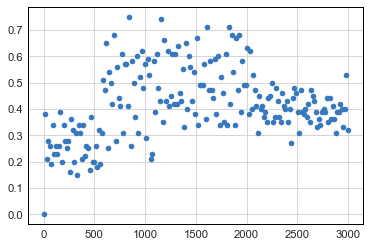

In [12]:
ion.reset_cmd()

# FlopDrive = Q.R(20*pi)
# wave = FlopDrive.AWG_Wave(w_c = 2*pi*200e6,dt=1e-9)

# print(R2.T_R)
# W_all = R2.cT() * R2_pi * W2 * R1_pi * W1 * R1
# W_all =  Q.R(20*pi, 0)        # 制备Hamilton的本征态 的叠加态
# theta = np.ones(Nt) * Theta
# phi   = m * t

# fx1 = np.sin(theta) * np.cos(phi)
# fy1 = np.sin(theta) * np.sin(phi)
# fz1 = np.cos(theta)

# # t = t + t[-1] + (t[1]-t[0])
# phi   = phi[::-1]
# fx2 = np.sin(theta) * np.cos(phi)
# fy2 = np.sin(theta) * np.sin(phi)
# fz2 = np.cos(theta)

# W1 = Q.Drive_Standard([fx1,fy1,fz1])

# theta = np.arctan2(sqrt(fy1[0]**2+fx1[0]**2),fz1[0]) + pi/2
# phi   = np.arctan2(fy1[0],fx1[0]) + pi/2   # 绕垂直的轴转，加 pi/2
# R1 = Q.R(theta, phi)        # 制备Hamilton的本征态 的叠加态

W_all = W2*R1_pi*W1*R1

print( len(R1)*dt)
print( len(R1_pi)*dt)
print( len(W1)*dt)
print( len(W2)*dt)
print( len(R2_pi)*dt)

wave = W_all.AWG_Wave(w_c = 2*pi*200e6,dt=1e-9,fun=np.cos)
print(len(wave))

wave1 = np.vstack((wave,wave))

strSeqRabi = '''
ts  = np.linspace(0,3000,200)

seq = [
(Cooling|Counting, 1000),
(Pumping,          20),
(Idle,             1.0),
(MW_Trigger,       0.2),
(MW,               ts),
(Detecting,        500),
(Idle,             1),
]
'''

strPlotsRabi='''
# set plotters
from Tasks.Plotters import qtCountsPlotter as CountPlt
from Tasks.Plotters import qtLinesPlotter as LinePlt
from Tasks.Plotters import qtStatesPlotter as StatePlt

Plotters = [
[('counts', CountPlt([0,1]))],
[('states', StatePlt([1],ts))],
]
'''

code = strHeader + strSeqRabi + strTask + strPlotsRabi + strDataFolder
# set code first, then load task
ion.setCode(code)

time.sleep(1)

print(ion.cmd('TaskFun', 'setWave',((wave1,wave1),(amp1,amp1))))
print(ion.cmd('start'))

x,y = ion.getPlotData('states',80000)  # get data


data = y[:,1]
plt.plot(x,data, 'o')
print(amp1)

4.98555970742e-05


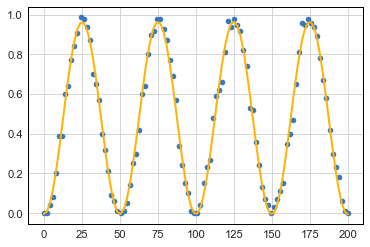

In [13]:
from scipy.optimize import curve_fit

# x,y = ion.getPlotData('states',40000)  # get data

# fitting
def funSin(x, x0, t0, A, B, tau):
    Y = A * np.exp(-(x - x0) / tau) * np.cos(2 * pi * (x - x0) / t0) / 2.0 + B
    return Y


def fitRabi(t, y):
    '''

    '''
    data_fft = abs(np.fft.fft(y))
    pos = max(enumerate(data_fft[1:len(t) / 2]), key=lambda x: x[1])[0]
    xmin = t[0]
    xmax = t[-1]
    xscale = xmax - xmin
    t0 = xscale / (pos + 1)
    A = max(y)
    B = 0.5
    x0 = 0.0
    tau = 0.5e-1  # 0.5 ms
    op = [x0, t0, A, B, tau]

    popt, pcov = curve_fit(funSin, t, y, op)
    # perr = np.sqrt(np.diag(pcov)
    #print (1.0 / popt[1], popt[1])

    return (1.0 / popt[1], popt, pcov)


data = y[:,1]
W0, popt, pcov = fitRabi(x*1e-6, data)   #fit
plt.plot(x,data, 'o')
plt.plot(x,funSin(x*1e-6,*popt))

print(popt[1])

# Save Data

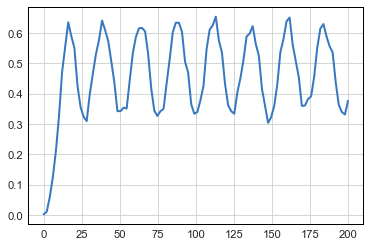

In [9]:
import pandas as pd

ts = time.strftime("%Y-%m-%d_%H.%M.%S", time.localtime())
fname = './data/Flopping_W1_test_14us_'+ts+'.csv'


x,y = ion.getPlotData('states',80000)  # get data

t = x
data = y[:,1]
df = pd.DataFrame(data={'y':data},index=t)
df.to_csv(fname,index_label='t (us)')

plt.plot(x,data)

## plot saved data

In [72]:
import pandas as pd

# df = pd.read_csv('./data/CoherentSate_2017-09-28_18.25.19.csv',index_col='t (us)')
df = pd.read_csv('./data/Flopping_W1_test_14us_2018-05-29_19.28.31.csv')

# plt.plot(df['0'])
plt.plot(df['t (us)'],df['y'])

IOError: File ./data/Flopping_W1_test_14us_2018-05-29_19.28.31.csv does not exist

In [41]:
W2.Phis

array([ -2.44929360e-16,  -6.33513340e-04,  -1.26702668e-03, ...,
         1.26702668e-03,   6.33513340e-04,   0.00000000e+00])

In [13]:
import numpy as np
-4*np.pi*np.cos(9*np.pi/20)

-1.965813464554555

In [58]:
a = [[1,2],[3,4]]
b = np.concatenate(a)
import random
random.sample(list(b),2)

[4, 3]

In [4]:
10000**2

100000000